In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import random

In [2]:
colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

In [3]:
data = pd.read_csv('C:/Users/mert.yigitcan/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(f'num rows: {data.shape[0]} \nnum columns:  {data.shape[1]}')

num rows: 7043 
num columns:  21


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
data.dropna(how = 'any', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


No     5163
Yes    1869
Name: Churn, dtype: int64

In precentages
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


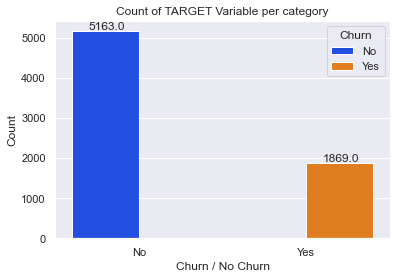

In [11]:
print(data['Churn'].value_counts())
print('')
print("In precentages")
print(f"{100*data['Churn'].value_counts(normalize = True)}")

#plotting results
ax = sns.countplot(x='Churn', hue= 'Churn', data = data, palette=random.choice(colors))
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

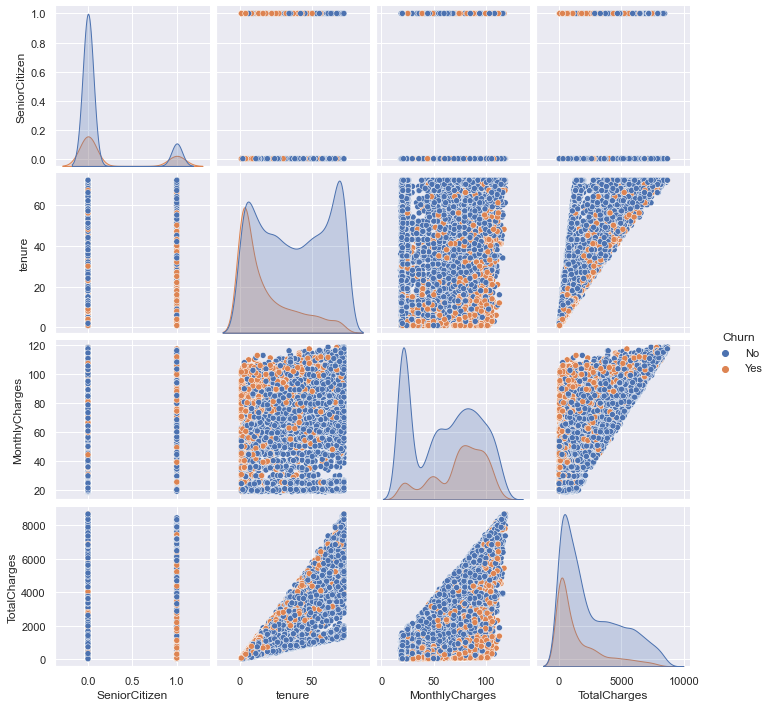

In [12]:
sns.pairplot(data.drop('customerID', axis=1), hue='Churn')
plt.show()

In [13]:
data = data.drop('customerID', axis=1)

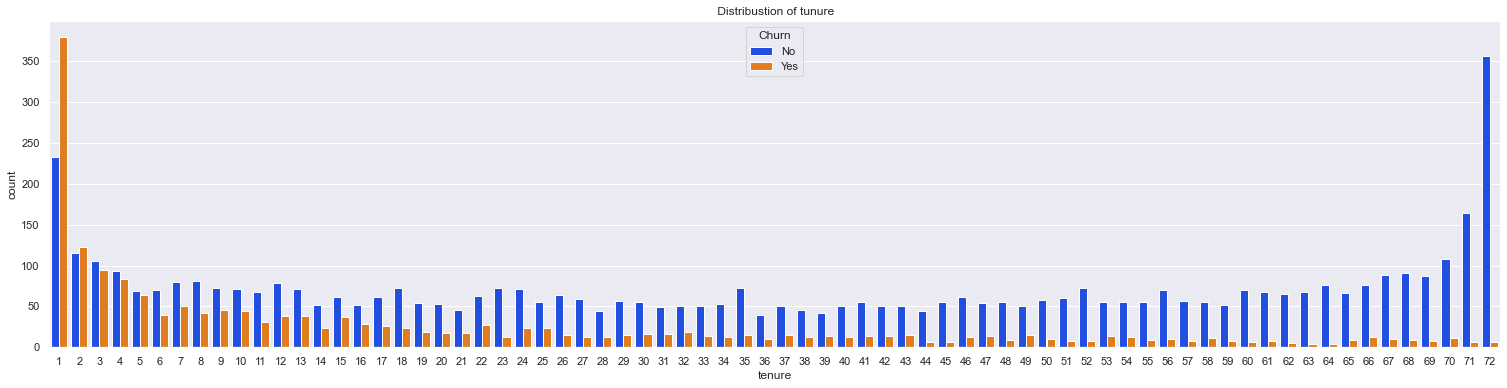

In [14]:
plt.figure(figsize=(26,6))
sns.countplot(x='tenure', hue= 'Churn', data = data, palette= 'bright')
plt.title(' Distribustion of tunure')
plt.show()

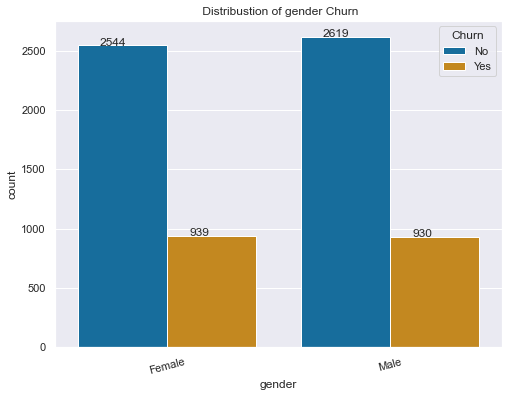

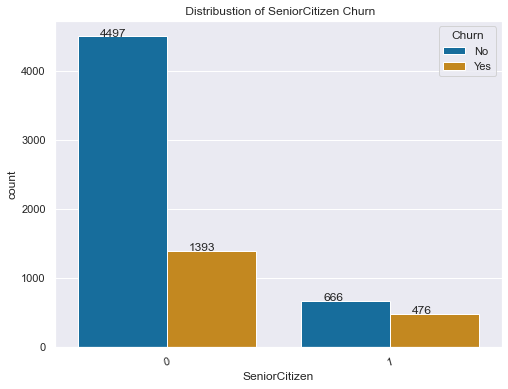

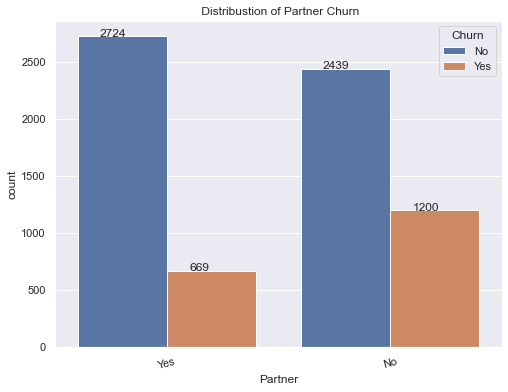

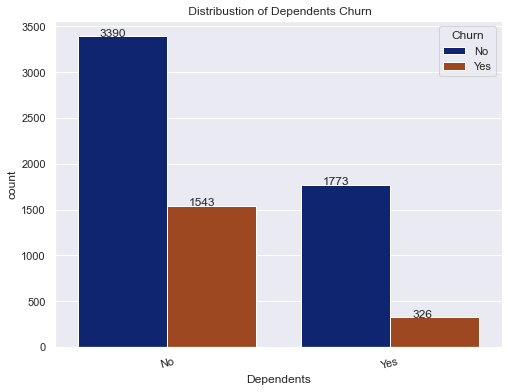

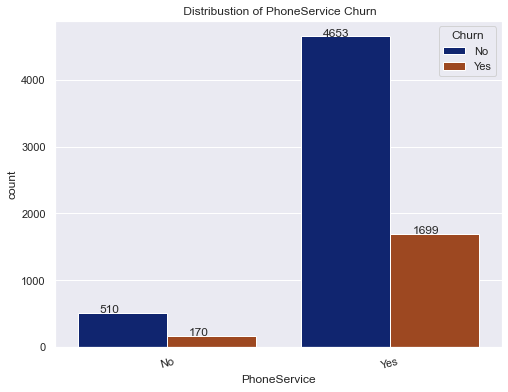

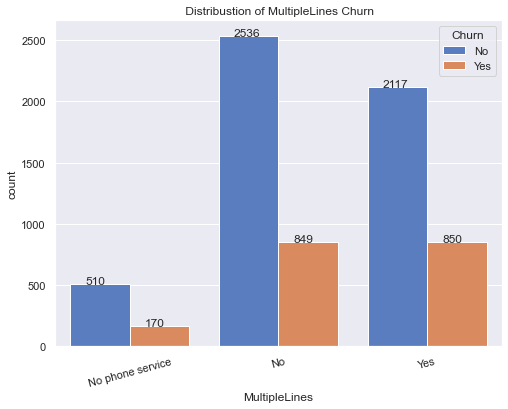

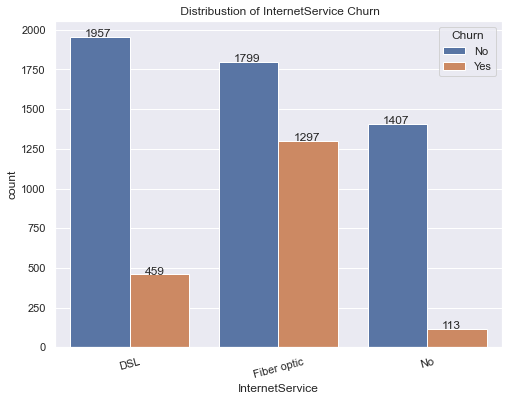

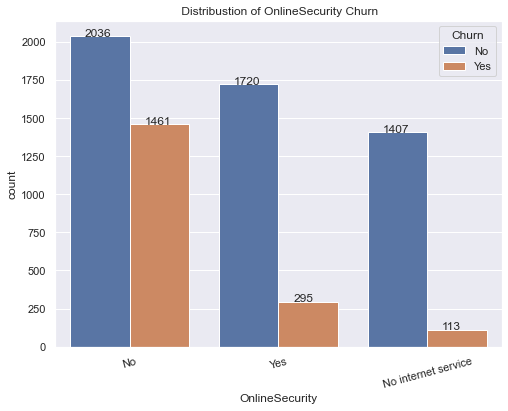

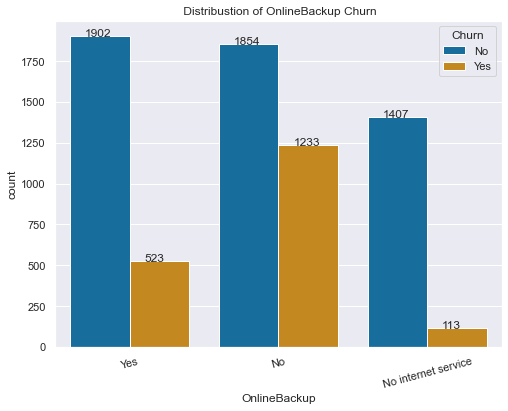

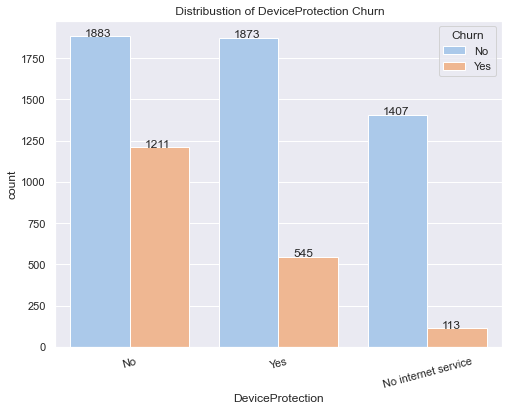

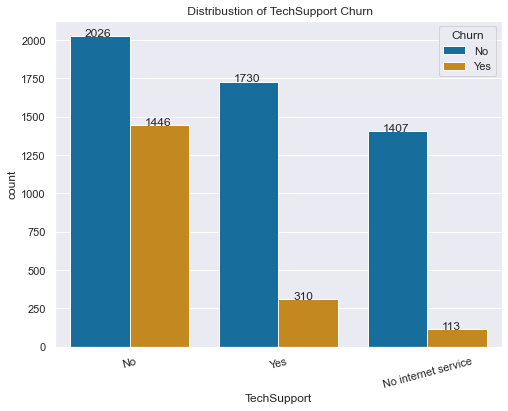

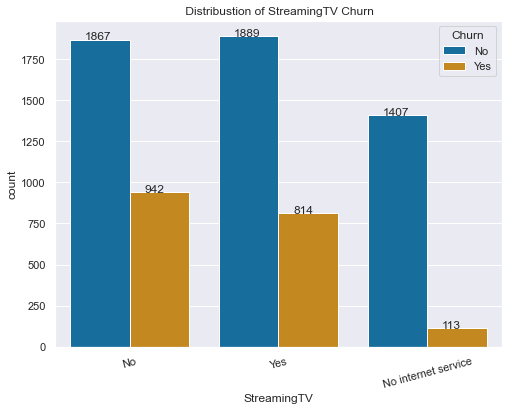

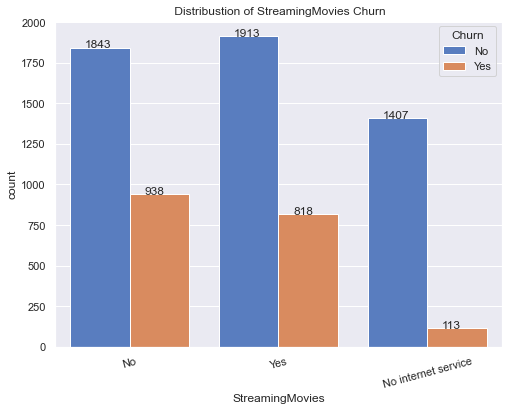

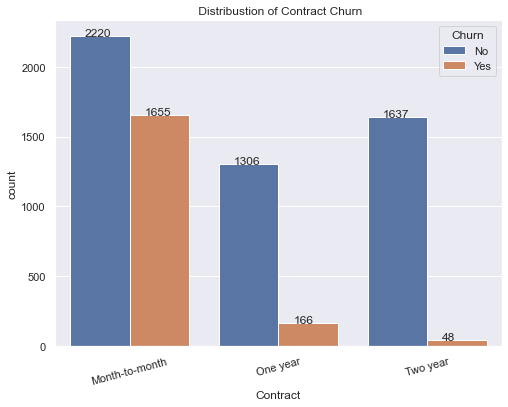

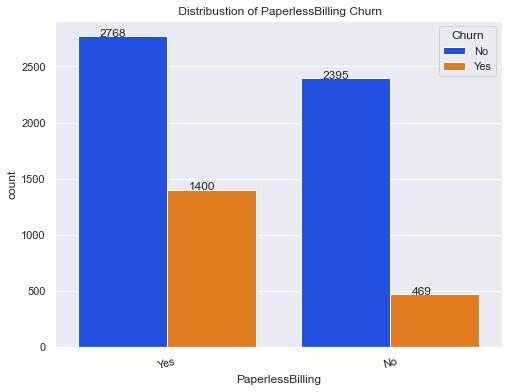

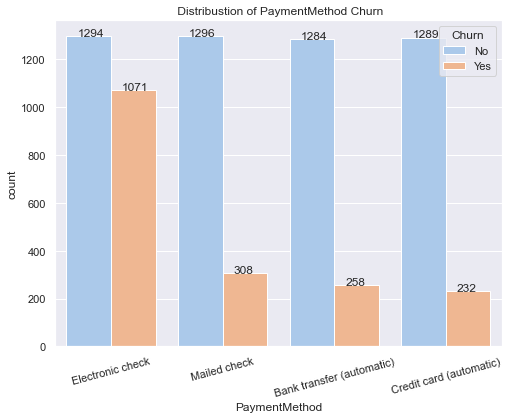

In [15]:
colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
for col in data.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis=1):
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=f'{col}', hue= 'Churn', data = data, palette=random.choice(colors))
    plt.title(f' Distribustion of {col} Churn')
    plt.xticks(rotation=15)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    plt.show()

In [16]:
data.loc[data["Churn"]=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


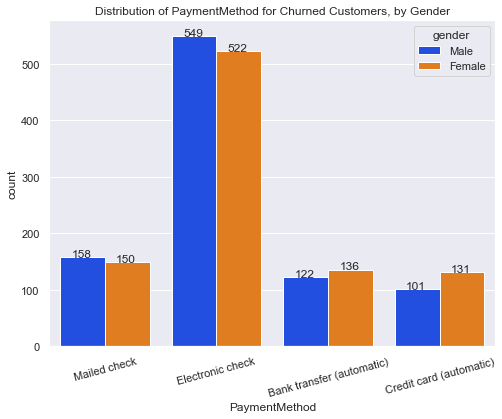

In [17]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data = data.loc[data["Churn"]=='Yes'], x= 'PaymentMethod', hue = 'gender',palette='bright',)
plt.title('Distribution of PaymentMethod for Churned Customers, by Gender')
plt.xticks(rotation=15)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.show;

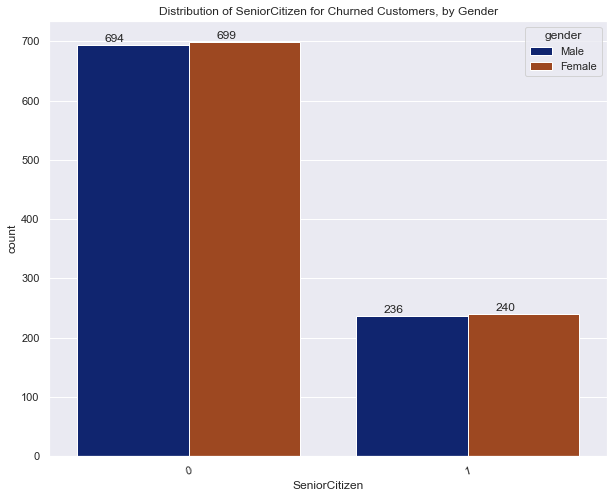

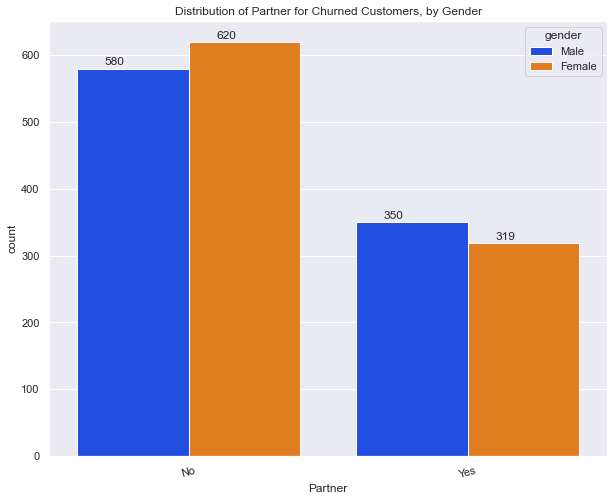

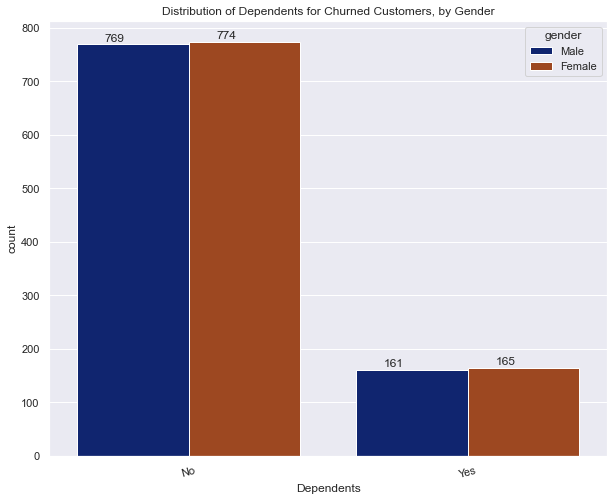

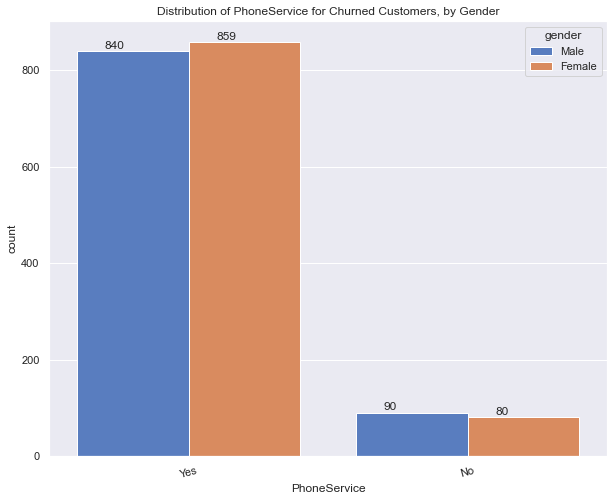

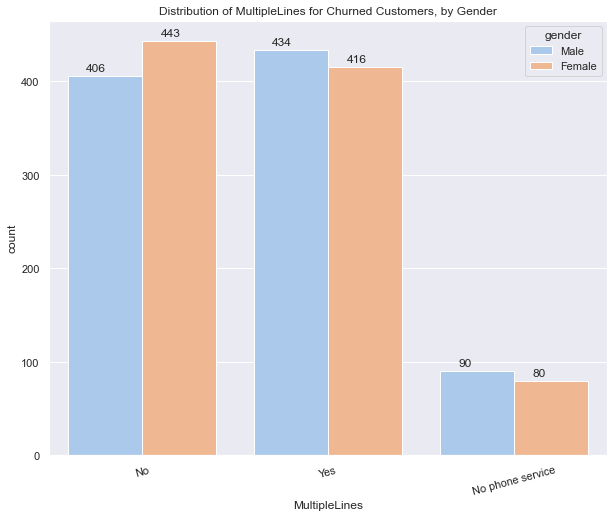

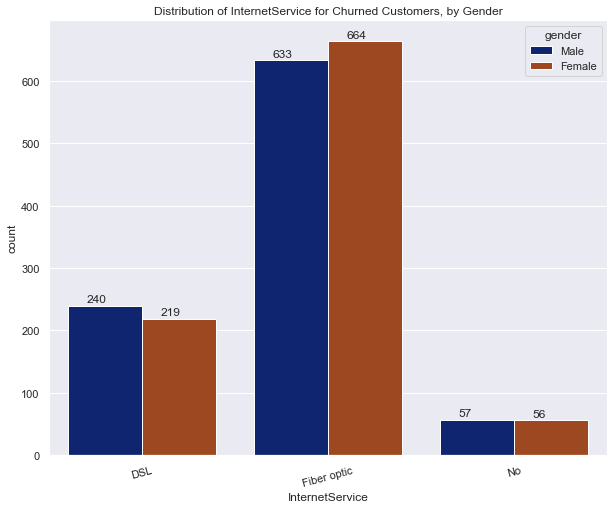

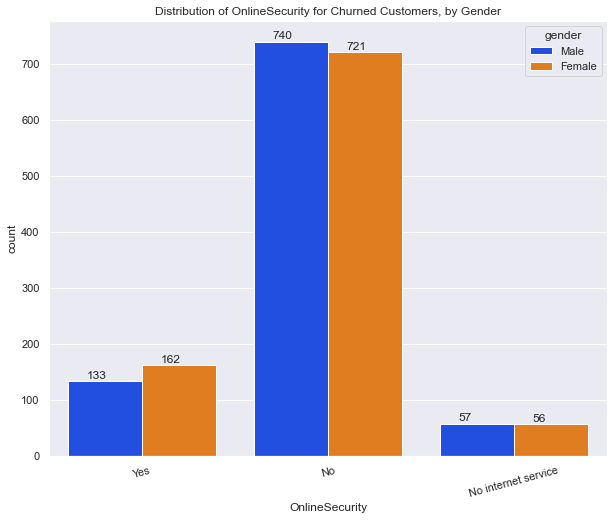

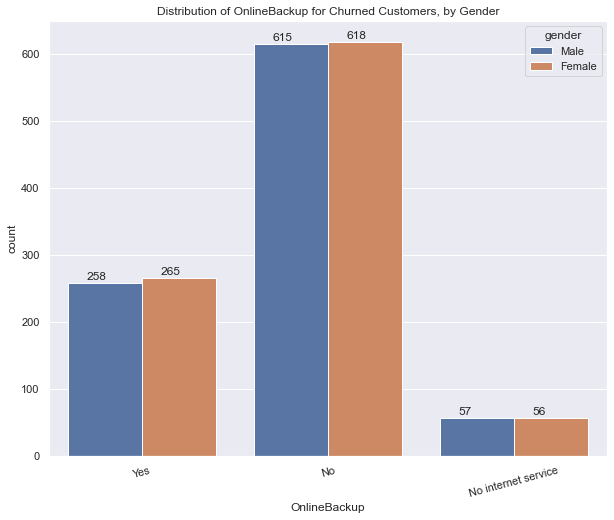

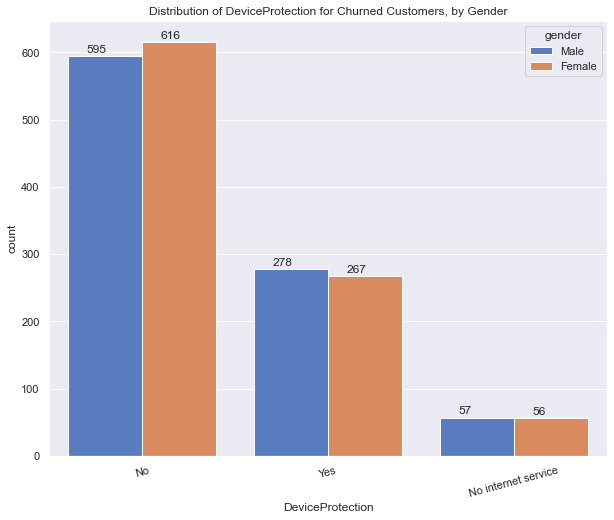

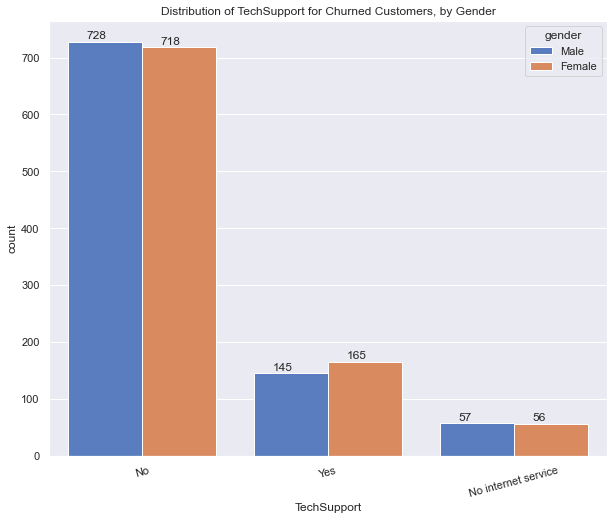

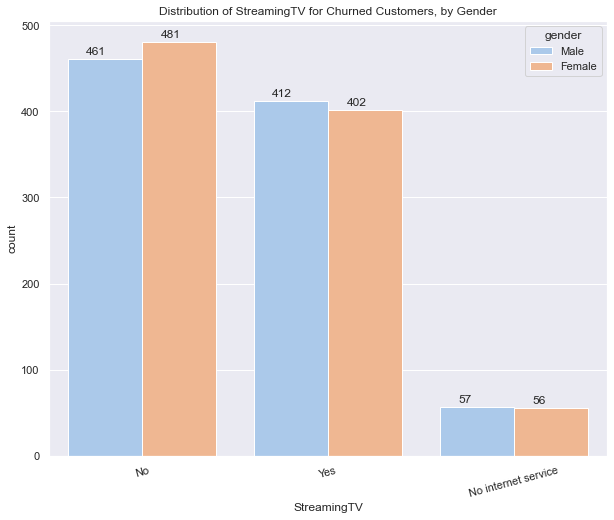

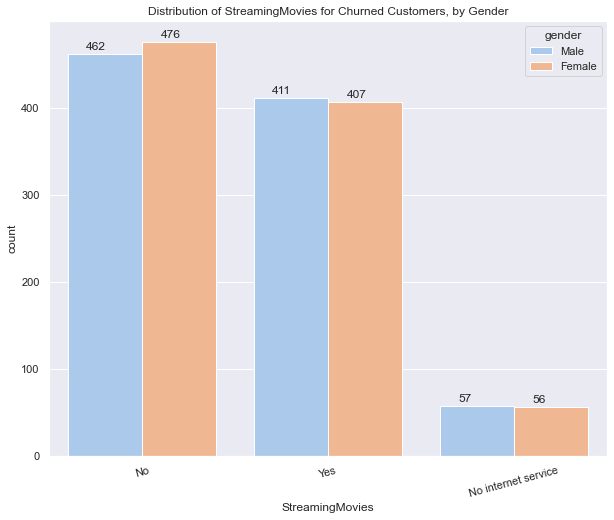

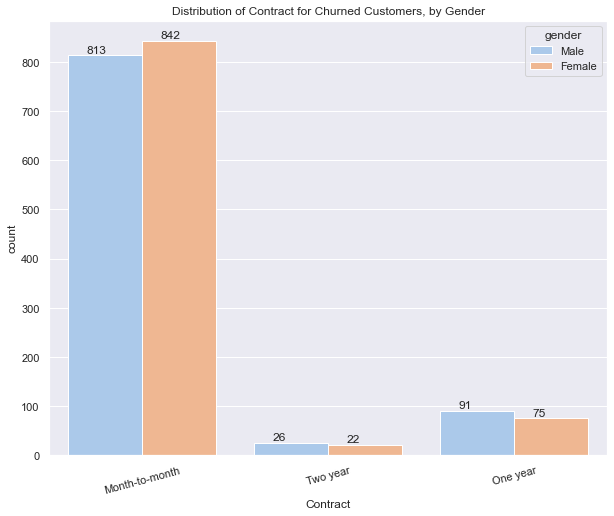

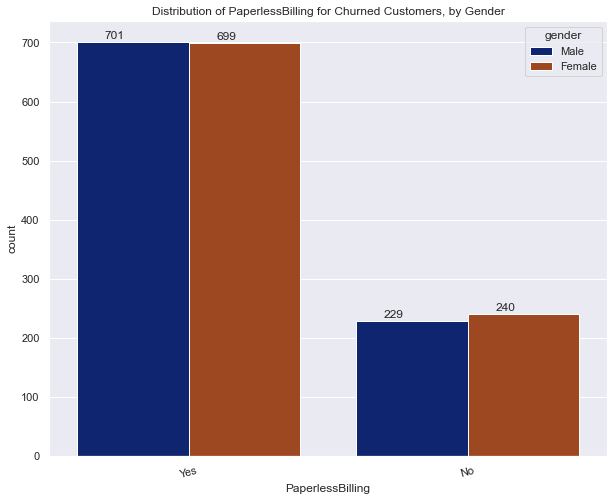

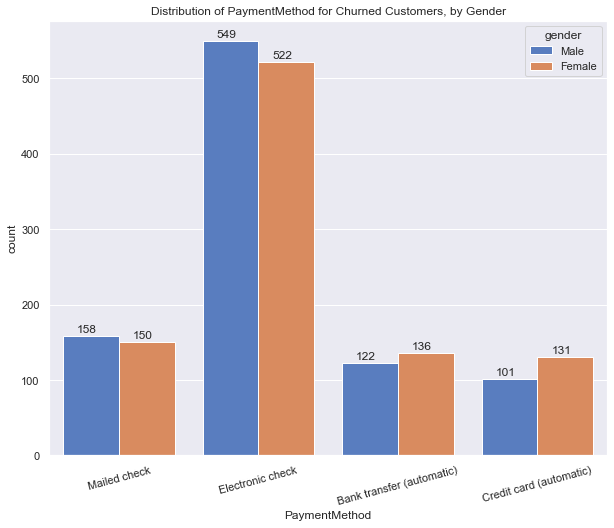

In [18]:
colors = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
for col in data.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure', 'gender'], axis=1):
    plt.figure(figsize=(10,8))
    ax = sns.countplot( data = data.loc[data["Churn"]=='Yes'], x= f'{col}', hue = 'gender',palette=random.choice(colors))
    plt.title(f'Distribution of {col} for Churned Customers, by Gender')
    plt.xticks(rotation=15)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    plt.show;

In [19]:
slim_data= data[['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges','Churn']]

In [20]:
slim_data['Churn'] = np.where(slim_data.Churn == 'Yes',1,0)

In [21]:
slim_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, fbeta_score, recall_score, confusion_matrix, accuracy_score, 
                             precision_recall_fscore_support, precision_score)

In [23]:
X= slim_data.drop('Churn', axis=1)
y=slim_data['Churn']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [25]:
base_lr = LogisticRegression(C=100)
base_lr.fit(x_train, y_train)
base_preds= base_lr.predict(x_test)

In [26]:
print(f'Recall score: {recall_score(y_test, base_preds)} ')
print(f'F1 score: {fbeta_score(y_test, base_preds,beta=1)} ')
print('')
print('confusion_matrix:')
confusion_matrix(y_test, base_preds)

Recall score: 0.4358288770053476 
F1 score: 0.5133858267716536 

confusion_matrix:


array([[935,  98],
       [211, 163]], dtype=int64)

In [27]:
accuracy_score(y_test, base_preds)

0.7803837953091685

In [28]:
sns.set_style("whitegrid")

In [29]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [30]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
full_data = data.copy()
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [31]:
full_data = pd.get_dummies(full_data, drop_first = True)
full_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Churn'),
  Text(1, 0, 'InternetService_Fiber optic'),
  Text(2, 0, 'PaymentMethod_Electronic check'),
  Text(3, 0, 'MonthlyCharges'),
  Text(4, 0, 'PaperlessBilling_Yes'),
  Text(5, 0, 'SeniorCitizen'),
  Text(6, 0, 'StreamingTV_Yes'),
  Text(7, 0, 'StreamingMovies_Yes'),
  Text(8, 0, 'MultipleLines_Yes'),
  Text(9, 0, 'PhoneService_Yes'),
  Text(10, 0, 'gender_Male'),
  Text(11, 0, 'MultipleLines_No phone service'),
  Text(12, 0, 'DeviceProtection_Yes'),
  Text(13, 0, 'OnlineBackup_Yes'),
  Text(14, 0, 'PaymentMethod_Mailed check'),
  Text(15, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(16, 0, 'Partner_Yes'),
  Text(17, 0, 'Dependents_Yes'),
  Text(18, 0, 'TechSupport_Yes'),
  Text(19, 0, 'OnlineSecurity_Yes'),
  Text(20, 0, 'Contract_One year'),
  Text(21, 0, 'TotalCharges'),
  Text(22, 0, 'DeviceProtection_No internet ser

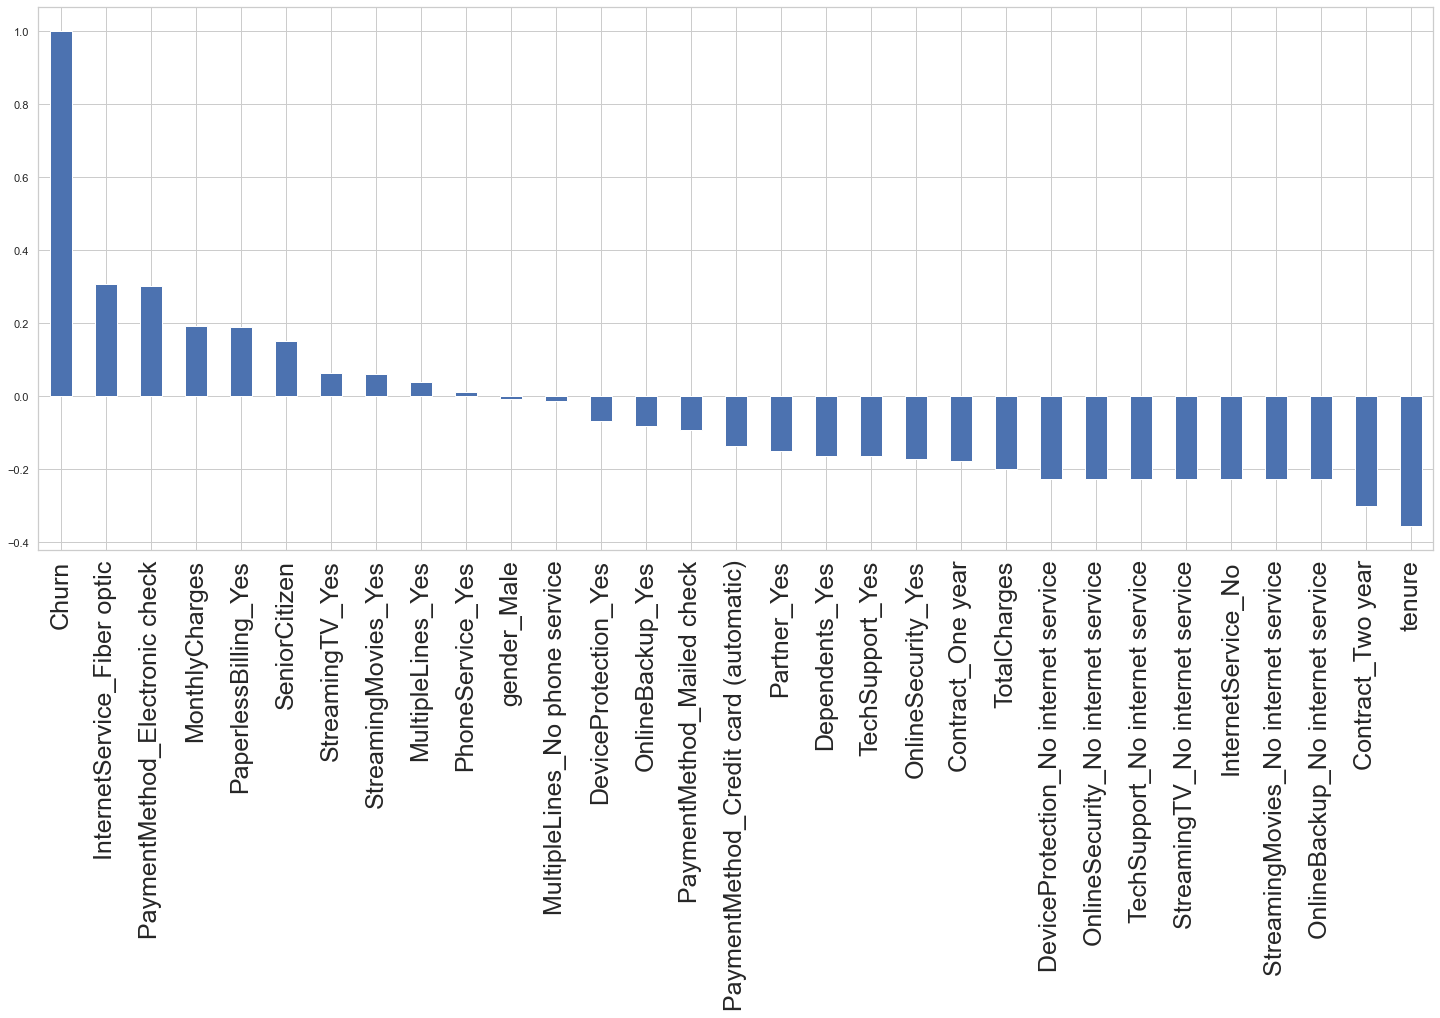

In [32]:
plt.figure(figsize=(25,10))
ax = full_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(fontsize=25, rotation=90)

In [33]:
full_data.shape

(7032, 31)

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [35]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.2, random_state=42)

In [37]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4500, 30), (4500,), (1125, 30), (1125,), (1407, 30), (1407,))

In [38]:
clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)
val_preds= clf.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, val_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, val_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, val_preds)

Val Recall score: 0.5346534653465347 
Val F1 score: 0.588021778584392 

 val confusion_matrix:


array([[736,  86],
       [141, 162]], dtype=int64)

In [39]:
accuracy_score(y_val, val_preds)

0.7982222222222223

In [40]:
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_cv = LogisticRegressionCV(cv=kf, random_state=42, Cs=c_list)
clf_cv.fit(x_train, y_train)
cv_preds= clf_cv.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, cv_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, cv_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, cv_preds)

Val Recall score: 0.5544554455445545 
Val F1 score: 0.6086956521739131 

 val confusion_matrix:


array([[741,  81],
       [135, 168]], dtype=int64)

In [41]:
accuracy_score(y_val, cv_preds)

0.808

In [42]:
clf_cv.C_

array([0.1004004])

Logistic Regression Model best F1 score 0.654 at prob decision threshold >= 0.323


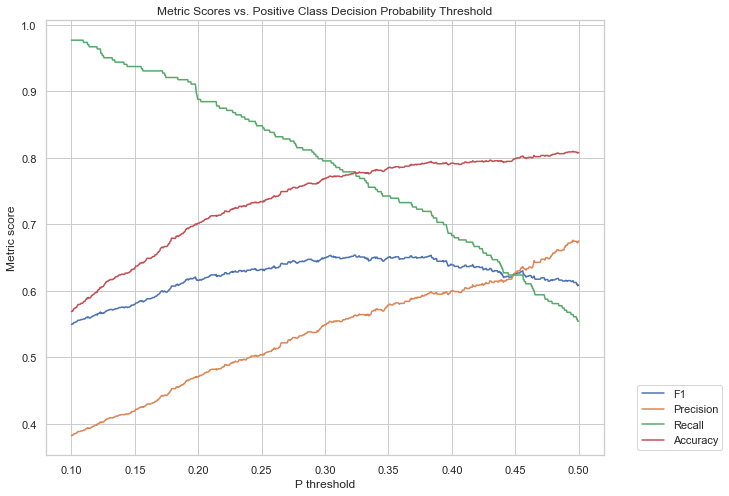

In [43]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_cv.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

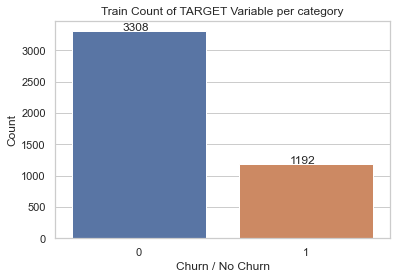

In [44]:
ax = sns.countplot(x= y_train)
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Train Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

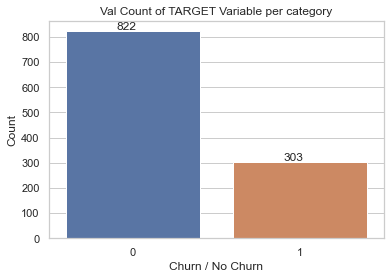

In [45]:
ax = sns.countplot(x= y_val )
plt.title("Val Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

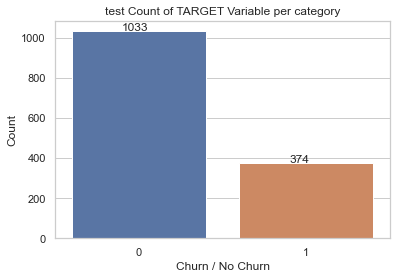

In [46]:
ax = sns.countplot(x= y_test)
plt.title("test Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))


In [47]:
from imblearn.over_sampling import ADASYN
from collections import Counter
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions


In [48]:
x_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(x_train, y_train)

In [49]:
Counter(y_train)

Counter({0: 3308, 1: 1192})

In [50]:
Counter(y_adasyn)

Counter({0: 3308, 1: 3325})

In [51]:
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_adasyn = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_adasyn.fit(x_adasyn, y_adasyn)
ada_preds= clf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, ada_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, ada_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_preds)

Val Recall score: 0.7260726072607261 
Val F1 score: 0.6258890469416786 

 val confusion_matrix:


array([[642, 180],
       [ 83, 220]], dtype=int64)

Logistic Regression Model best F1 score 0.626 at prob decision threshold >= 0.500


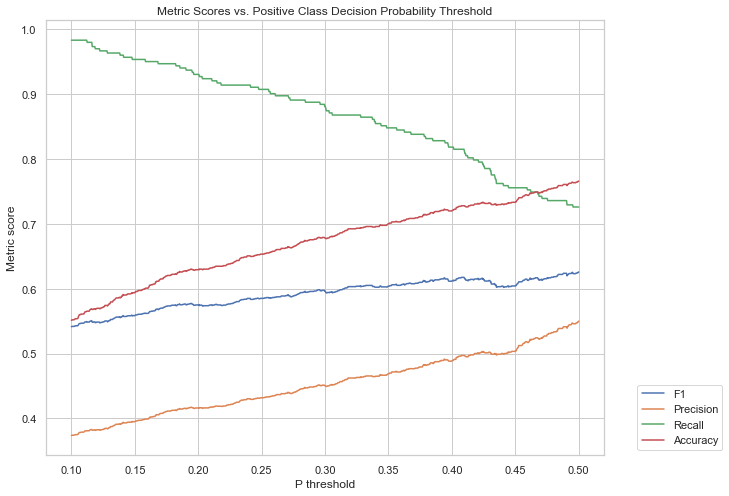

In [52]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [53]:
from imblearn.over_sampling import SMOTE
x_smoted, y_smoted = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [54]:
Counter(y_smoted)

Counter({0: 3308, 1: 3308})

In [55]:
c_list = np.linspace(.10,10,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_smt = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_smt.fit(x_smoted, y_smoted)
smt_preds= clf_smt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, smt_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, smt_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, smt_preds)

Val Recall score: 0.7161716171617162 
Val F1 score: 0.6317321688500728 

 val confusion_matrix:


array([[655, 167],
       [ 86, 217]], dtype=int64)

In [56]:
clf_smt.C_

array([3.0036036])

In [57]:
accuracy_score(y_val,smt_preds )

0.7751111111111111

Logistic Regression Model best F1 score 0.632 at prob decision threshold >= 0.500


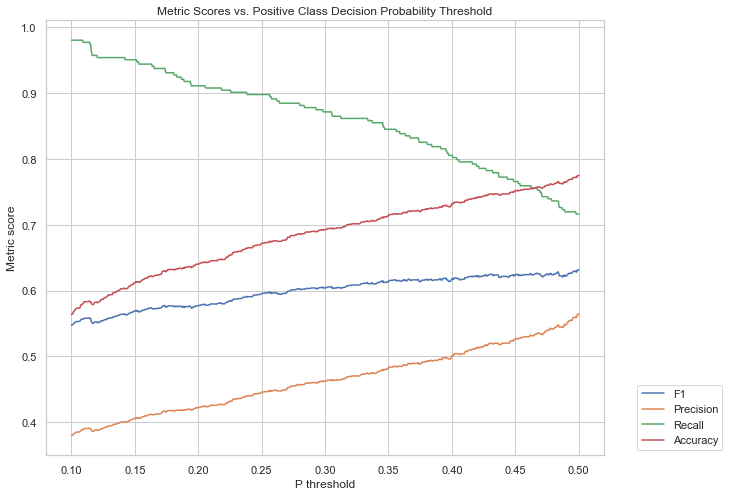

In [58]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_smt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [59]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%config InlineBackend.figure_formats = ['svg']  # or 'retina'

from sklearn.metrics import fbeta_score, make_scorer

In [60]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [61]:
f1_scorer = make_scorer(fbeta_score, beta=1)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f1_scorer)

print(scores)

[0.48669202 0.54873646 0.52631579 0.50896057 0.47826087 0.57243816
 0.5037594  0.5093633  0.51492537 0.5019305 ]


In [62]:
k_range = list(range(1, 41))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f1_scorer)
    k_scores.append(scores.mean())

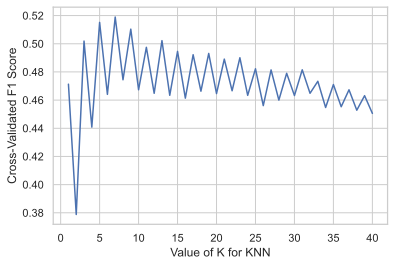

In [63]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1 Score')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 100))
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring= f1_scorer)

# fit the grid with data
grid.fit(x_train, y_train);

In [65]:
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011069,0.003846,0.185560,0.054264,1,{'n_neighbors': 1},0.421405,0.514469,0.489028,0.483221,0.432787,0.513158,0.455782,0.438538,0.504983,0.459364,0.471274,0.032613,18
1,0.011371,0.004142,0.132649,0.013702,2,{'n_neighbors': 2},0.372727,0.410480,0.392694,0.296296,0.367713,0.434389,0.347418,0.390698,0.394366,0.381395,0.378818,0.035537,99
2,0.014362,0.010309,0.169354,0.045477,3,{'n_neighbors': 3},0.494624,0.524823,0.485507,0.496644,0.464789,0.552448,0.469751,0.486891,0.535714,0.507576,0.501877,0.026910,5
3,0.010374,0.001849,0.175033,0.033895,4,{'n_neighbors': 4},0.422414,0.455696,0.412281,0.450000,0.384279,0.489451,0.461538,0.412281,0.491803,0.428571,0.440832,0.033187,49
4,0.017058,0.010081,0.210143,0.048626,5,{'n_neighbors': 5},0.486692,0.548736,0.526316,0.508961,0.478261,0.572438,0.503759,0.509363,0.514925,0.501931,0.515138,0.026611,2


In [66]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 7}
Best estimator:  KNeighborsClassifier(n_neighbors=7)
Best score:  0.5189494499854447


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.25, random_state=42)

In [70]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dt_pred)} ')
print(f'Val F1 score: {fbeta_score(y_val, dt_pred,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dt_pred)

Val Recall score: 0.6201550387596899 
Val F1 score: 0.6290956749672346 

 val confusion_matrix:


array([[884, 136],
       [147, 240]], dtype=int64)

In [71]:
dt_tpred=dt.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, dt_tpred)} ')
print(f'Val F1 score: {fbeta_score(y_test, dt_tpred,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, dt_tpred)

Val Recall score: 0.5320855614973262 
Val F1 score: 0.5489655172413793 

 val confusion_matrix:


array([[881, 152],
       [175, 199]], dtype=int64)

Decision Model best F1 score 0.650 at prob decision threshold >= 0.320


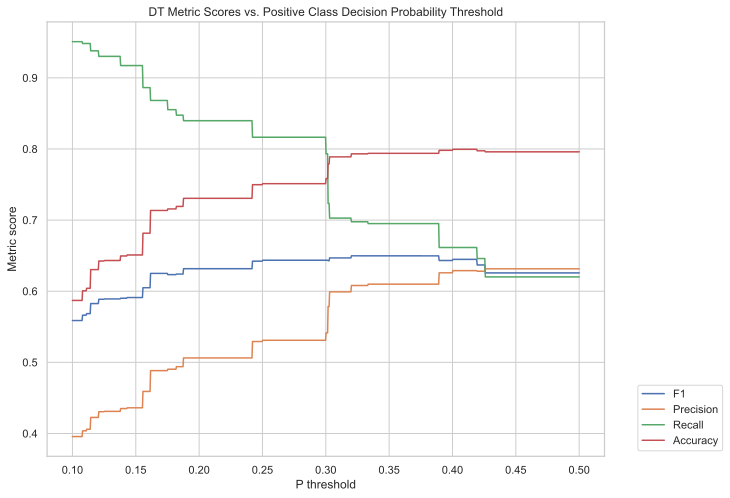

In [72]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('DT Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Decision Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [73]:
# fit log reg with adasyn data

dt_adasyn=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=9, min_samples_leaf=10)
dt_adasyn.fit(x_adasyn, y_adasyn)
dtada_preds= dt_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dtada_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, dtada_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dtada_preds)


Val Recall score: 0.7493540051679587 
Val F1 score: 0.6387665198237886 

 val confusion_matrix:


array([[789, 231],
       [ 97, 290]], dtype=int64)

Logistic Regression Model best F1 score 0.647 at prob decision threshold >= 0.462


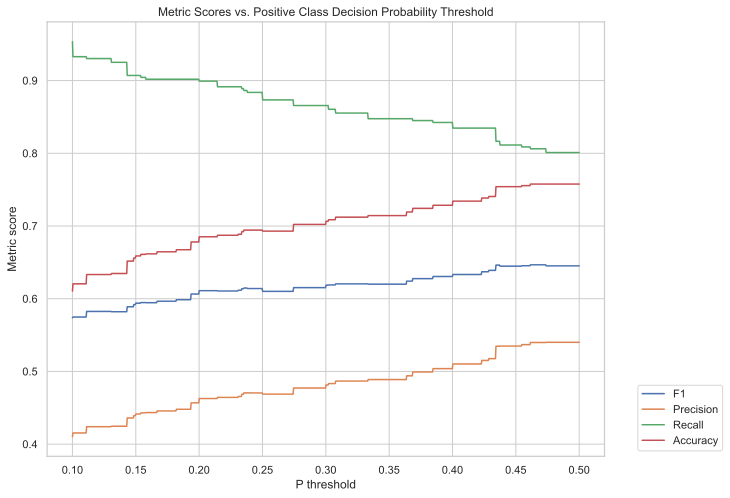

In [74]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

DT Model best test F1 score 0.585 at prob decision threshold >= 0.462


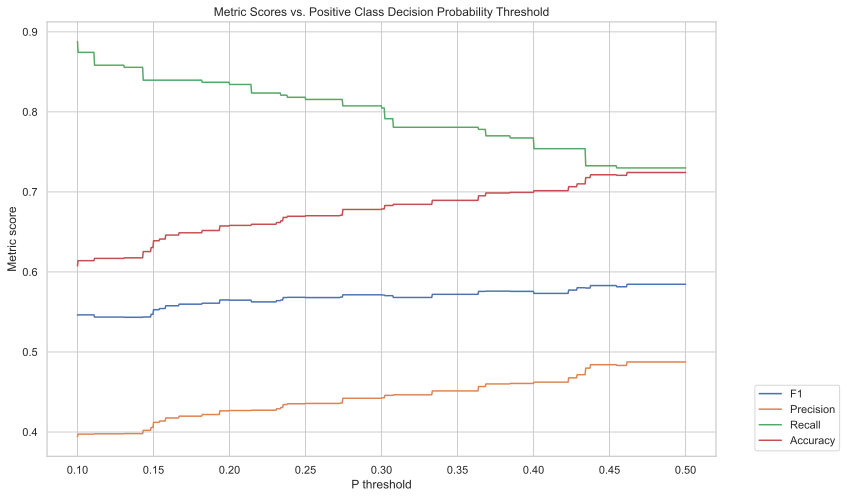

In [75]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = dt_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('DT Model best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [76]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=12)
rf_model.fit(x_train,y_train)
rf_preds=rf_model.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rf_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, rf_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rf_preds)

Val Recall score: 0.5064599483204134 
Val F1 score: 0.5833333333333334 

 val confusion_matrix:


array([[931,  89],
       [191, 196]], dtype=int64)

Base RF Model best F1 score 0.670 at prob decision threshold >= 0.380


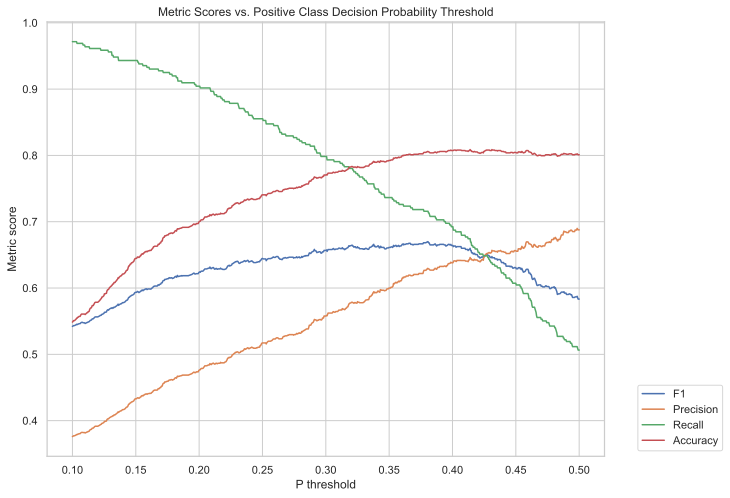

In [77]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_model.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Base RF Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

RF Model best test F1 score 0.627 at prob decision threshold >= 0.314


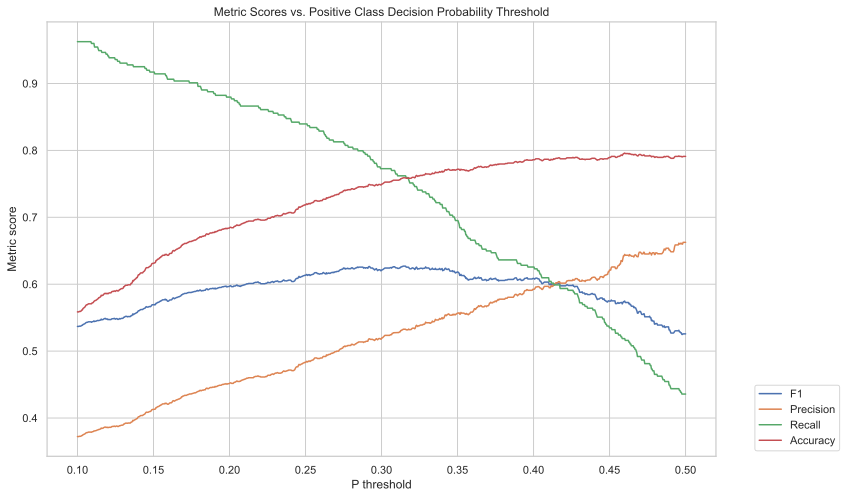

In [78]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_model.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('RF Model best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [79]:
rf_adasyn=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=5, min_samples_leaf=12)
rf_adasyn.fit(x_adasyn, y_adasyn)
rfada_preds= rf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rfada_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, rfada_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rfada_preds)

Val Recall score: 0.7984496124031008 
Val F1 score: 0.6351490236382321 

 val confusion_matrix:


array([[743, 277],
       [ 78, 309]], dtype=int64)

RF ADASYN Model best F1 score 0.636 at prob decision threshold >= 0.481


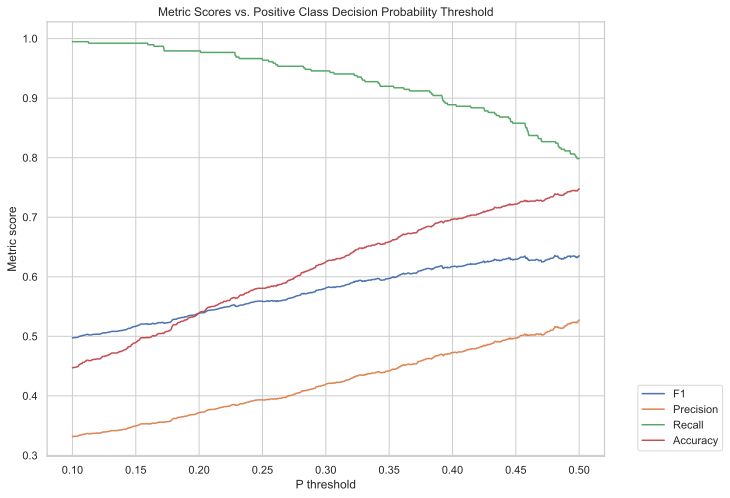

In [80]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('RF ADASYN Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

RF ADYSYN best test F1 score 0.604 at prob decision threshold >= 0.437


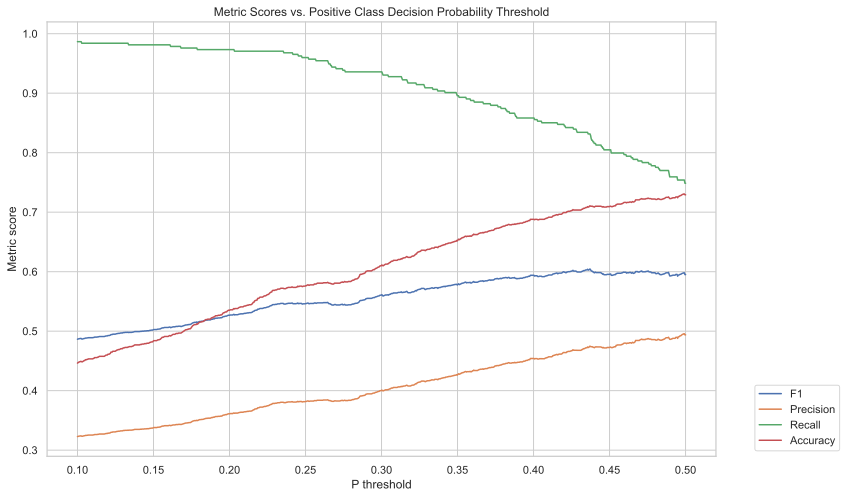

In [81]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('RF ADYSYN best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [82]:
%config InlineBackend.figure_formats = ['retina']

import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix 

In [83]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])
            

fbeta_score(y_test, clf_xgb.predict(x_test, ntree_limit=clf_xgb.best_ntree_limit), beta=1) 

[0]	validation_0-aucpr:0.64290
[1]	validation_0-aucpr:0.65484
[2]	validation_0-aucpr:0.65762
[3]	validation_0-aucpr:0.65909
[4]	validation_0-aucpr:0.66502
[5]	validation_0-aucpr:0.66557
[6]	validation_0-aucpr:0.67146
[7]	validation_0-aucpr:0.67172
[8]	validation_0-aucpr:0.67385
[9]	validation_0-aucpr:0.67764
[10]	validation_0-aucpr:0.67808
[11]	validation_0-aucpr:0.67888
[12]	validation_0-aucpr:0.67749
[13]	validation_0-aucpr:0.67669
[14]	validation_0-aucpr:0.67281
[15]	validation_0-aucpr:0.67265
[16]	validation_0-aucpr:0.67115
[17]	validation_0-aucpr:0.67181
[18]	validation_0-aucpr:0.67051
[19]	validation_0-aucpr:0.66892
[20]	validation_0-aucpr:0.66921
[21]	validation_0-aucpr:0.66887
[22]	validation_0-aucpr:0.66768
[23]	validation_0-aucpr:0.66690
[24]	validation_0-aucpr:0.66689
[25]	validation_0-aucpr:0.66624
[26]	validation_0-aucpr:0.66529
[27]	validation_0-aucpr:0.66316
[28]	validation_0-aucpr:0.66135
[29]	validation_0-aucpr:0.66127
[30]	validation_0-aucpr:0.65828
[31]	validation_0-

0.5535168195718654

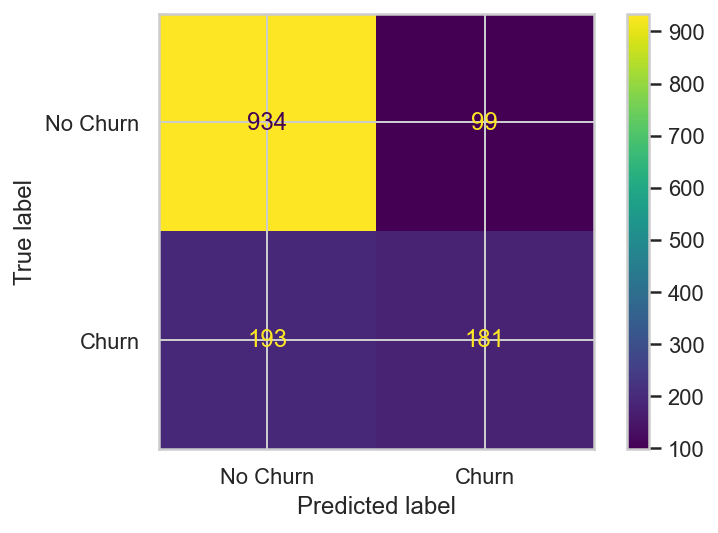

In [84]:
plot_confusion_matrix(clf_xgb, 
                      x_test, 
                      y_test,
                      values_format='d',
                      display_labels=["No Churn", "Churn"])

In [85]:
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [.05, 0.1, 0.5],
    'gamma': [0.5, 1, 1.25],
    'reg_lambda': [5,7,10.0,],
     'scale_pos_weight': [ .5, 1, 3]
}
## Output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10.


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [86]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])

xgb_preds=clf_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, xgb_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, xgb_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, xgb_preds)

[0]	validation_0-aucpr:0.50527
[1]	validation_0-aucpr:0.54788
[2]	validation_0-aucpr:0.58796
[3]	validation_0-aucpr:0.63235
[4]	validation_0-aucpr:0.64396
[5]	validation_0-aucpr:0.65485
[6]	validation_0-aucpr:0.66048
[7]	validation_0-aucpr:0.66143
[8]	validation_0-aucpr:0.66821
[9]	validation_0-aucpr:0.66919
[10]	validation_0-aucpr:0.67208
[11]	validation_0-aucpr:0.67210
[12]	validation_0-aucpr:0.67626
[13]	validation_0-aucpr:0.67801
[14]	validation_0-aucpr:0.67889
[15]	validation_0-aucpr:0.67711
[16]	validation_0-aucpr:0.67676
[17]	validation_0-aucpr:0.67550
[18]	validation_0-aucpr:0.67596
[19]	validation_0-aucpr:0.67385
[20]	validation_0-aucpr:0.67632
[21]	validation_0-aucpr:0.67613
[22]	validation_0-aucpr:0.67724
[23]	validation_0-aucpr:0.67758
[24]	validation_0-aucpr:0.67794
[25]	validation_0-aucpr:0.67940
[26]	validation_0-aucpr:0.68124
[27]	validation_0-aucpr:0.68275
[28]	validation_0-aucpr:0.68140
[29]	validation_0-aucpr:0.68120
[30]	validation_0-aucpr:0.68159
[31]	validation_0-

array([[727, 293],
       [ 58, 329]], dtype=int64)

XGBoost Model best F1 score 0.653 at prob decision threshold >= 0.493


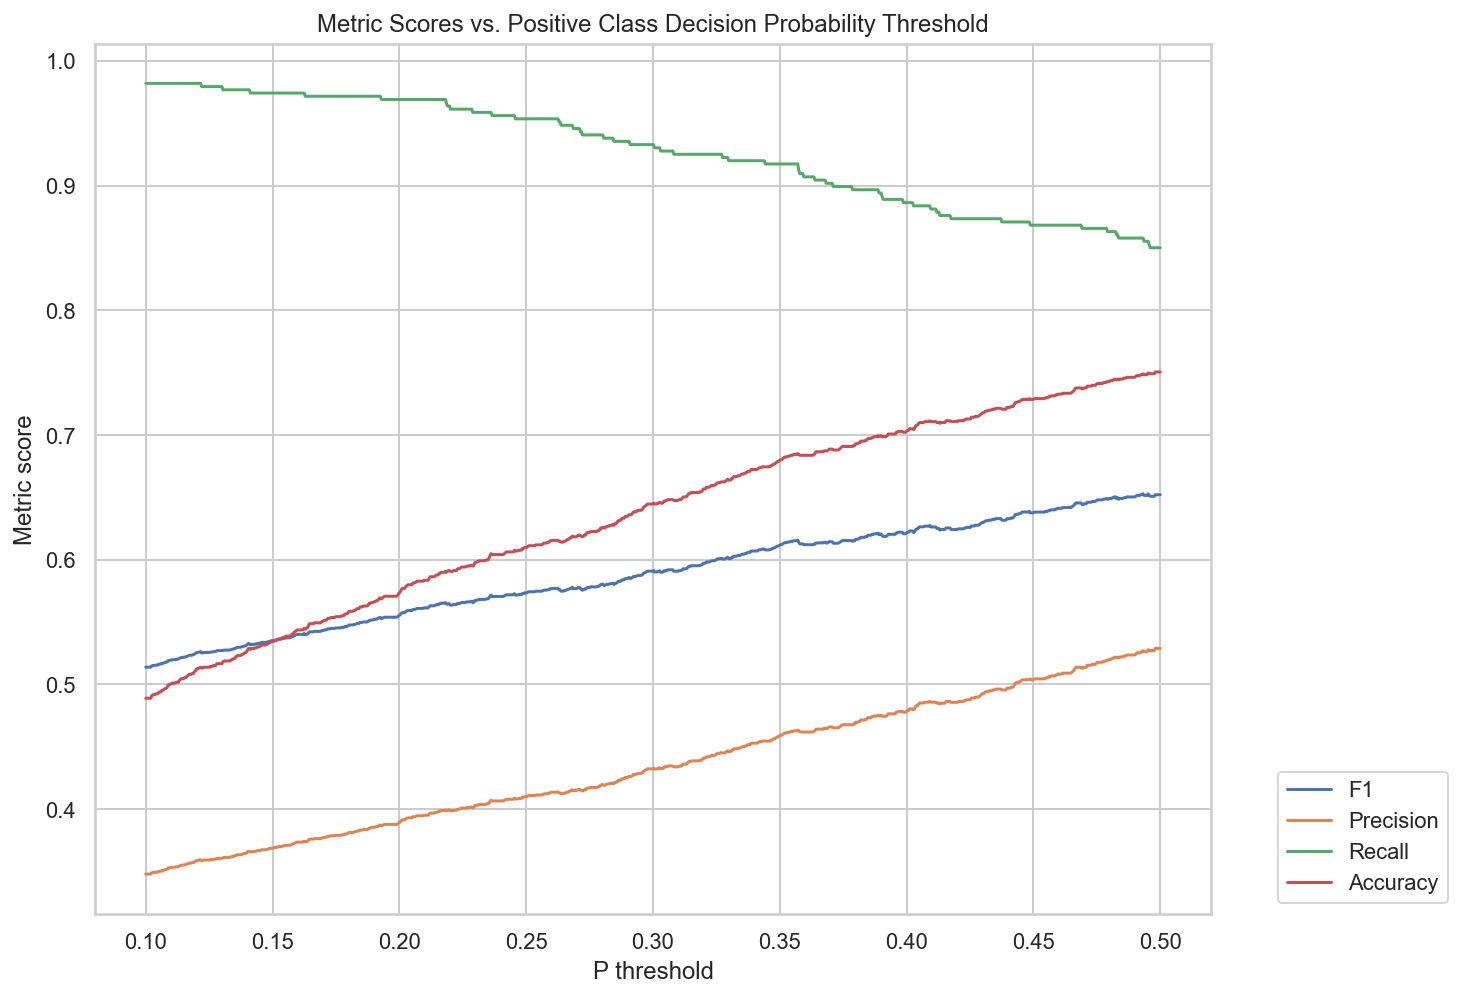

In [87]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('XGBoost Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

XGBoost best test F1 score 0.613 at prob decision threshold >= 0.500


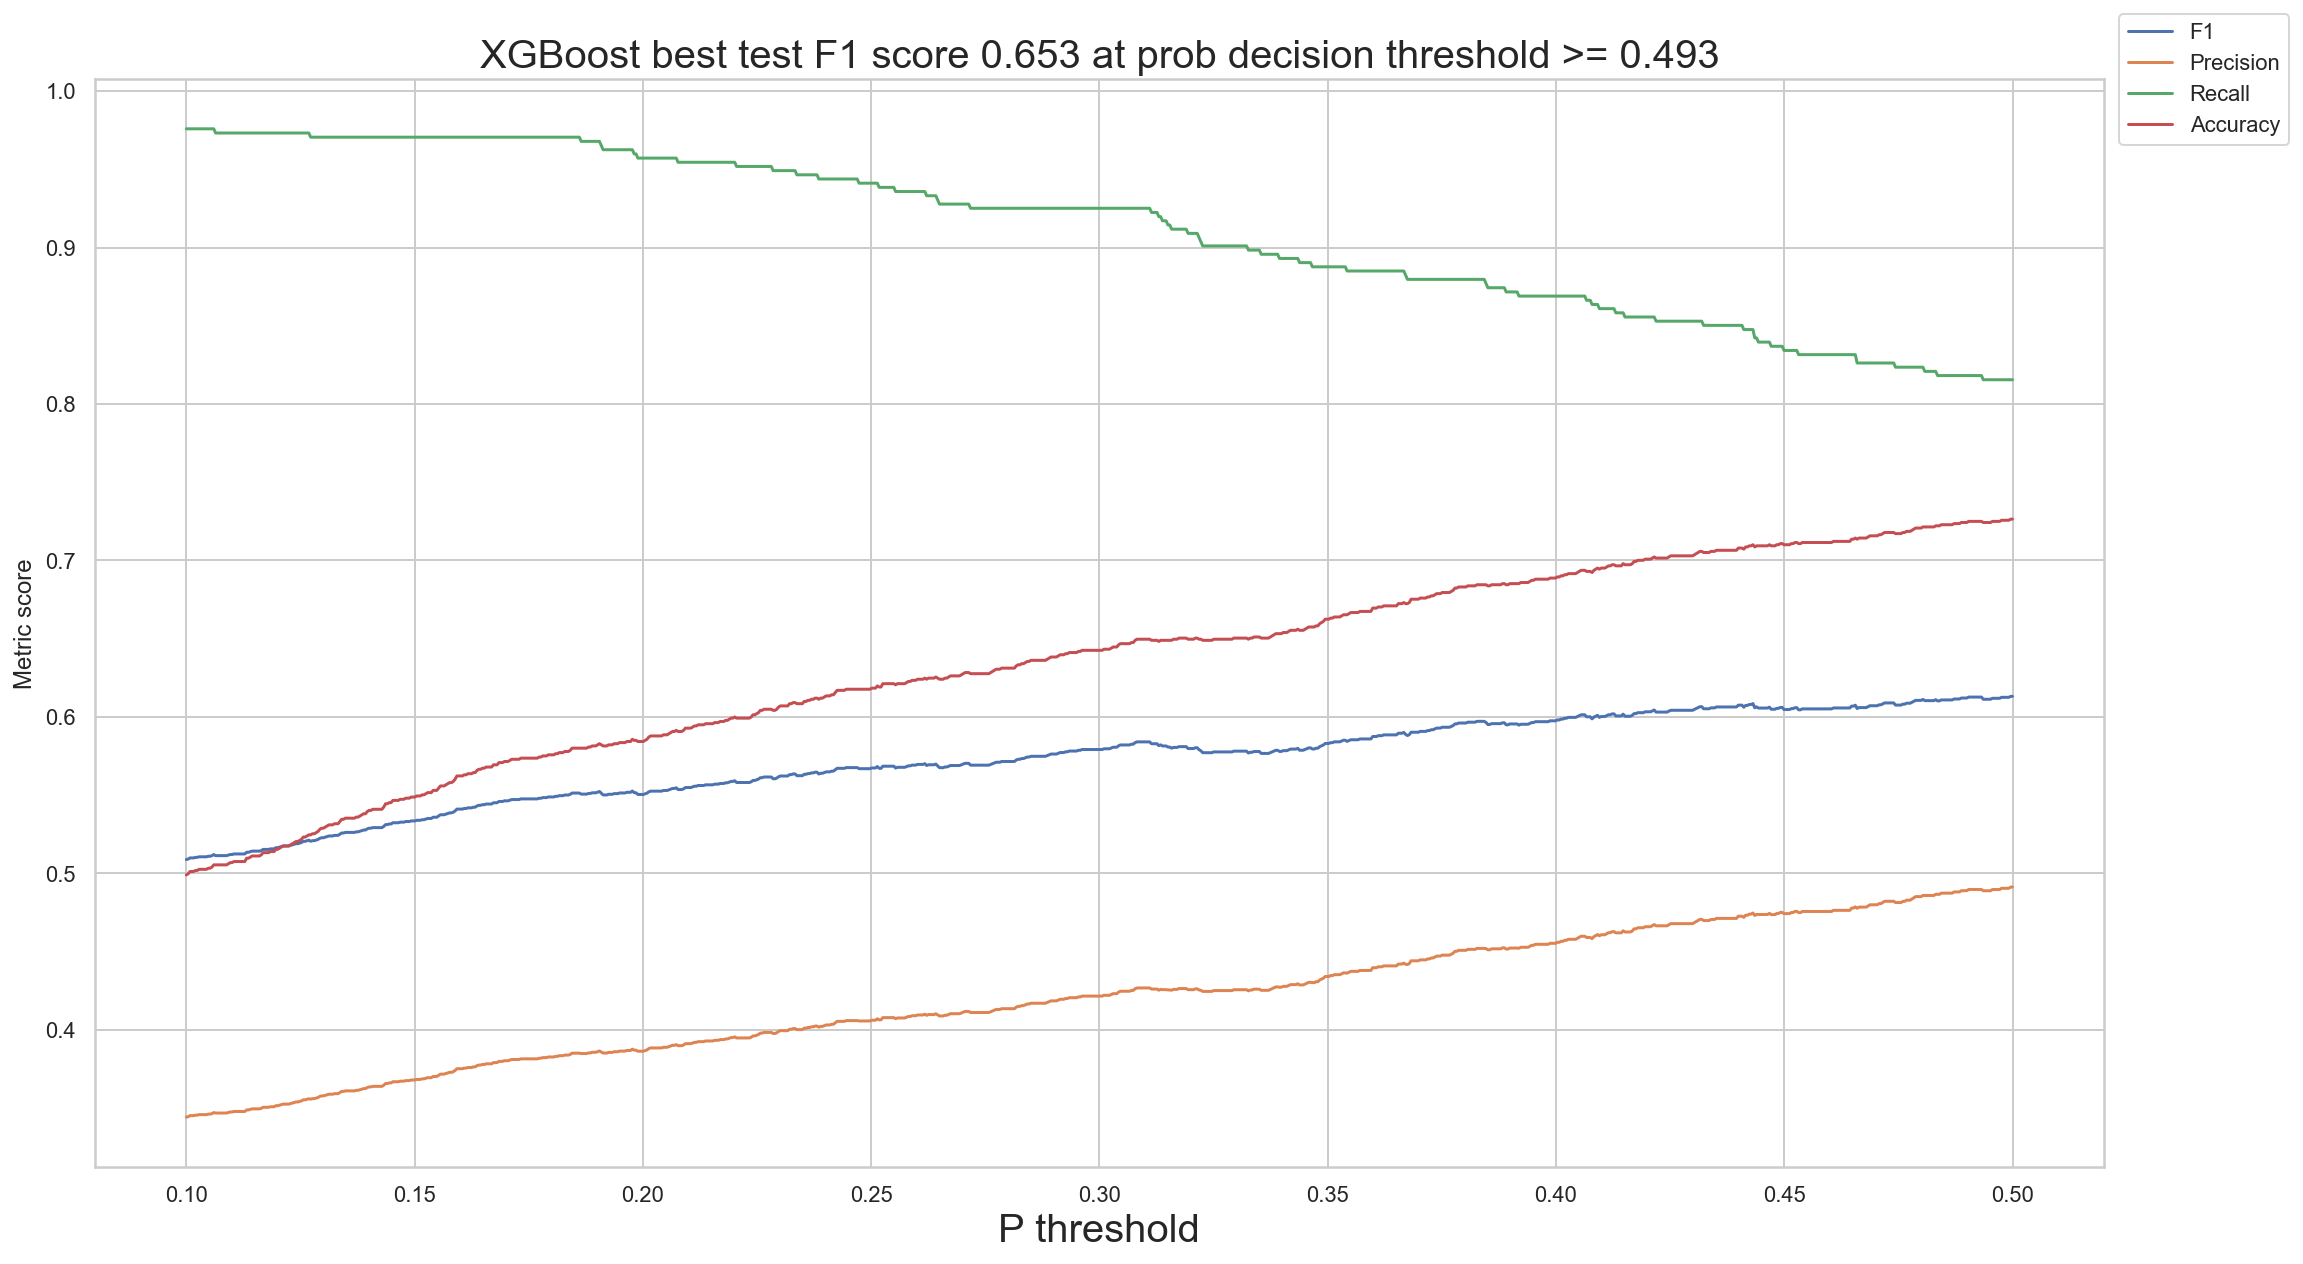

In [88]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = clf_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(18,10))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('XGBoost best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p),fontdict={'size': 20})
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold',fontdict={'size': 20})
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('XGBoost best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [89]:
## First lets find optimal parameters

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3,5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output1: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}

# Because most of our params were at the end were at the ends of their range, we will continue to those...

## ROUND 2
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [.01, 0.1, 1],
    'gamma': [0.25, .5, 1],
    'reg_lambda': [0,0.5,1.0,],
     'scale_pos_weight': [1, 3,5]
}
## Output2: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_adasyn, 
                   y_adasyn, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}


In [90]:
ada_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=0,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
ada_xgb.fit(x_adasyn, 
            y_adasyn, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_metric='aucpr',
            eval_set=[(x_val, y_val)])

ada_xgb_preds=ada_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, ada_xgb_preds)} ')
print(f'Val F1 score: {fbeta_score(y_val, ada_xgb_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_xgb_preds)

[0]	validation_0-aucpr:0.51932
[1]	validation_0-aucpr:0.58610
[2]	validation_0-aucpr:0.59217
[3]	validation_0-aucpr:0.59076
[4]	validation_0-aucpr:0.59437
[5]	validation_0-aucpr:0.60800
[6]	validation_0-aucpr:0.60901
[7]	validation_0-aucpr:0.60996
[8]	validation_0-aucpr:0.61519
[9]	validation_0-aucpr:0.61583
[10]	validation_0-aucpr:0.61231
[11]	validation_0-aucpr:0.63274
[12]	validation_0-aucpr:0.63657
[13]	validation_0-aucpr:0.63688
[14]	validation_0-aucpr:0.63643
[15]	validation_0-aucpr:0.63574
[16]	validation_0-aucpr:0.63865
[17]	validation_0-aucpr:0.63681
[18]	validation_0-aucpr:0.64062
[19]	validation_0-aucpr:0.64360
[20]	validation_0-aucpr:0.63959
[21]	validation_0-aucpr:0.63822
[22]	validation_0-aucpr:0.63968
[23]	validation_0-aucpr:0.63997
[24]	validation_0-aucpr:0.64179
[25]	validation_0-aucpr:0.64340
[26]	validation_0-aucpr:0.64679
[27]	validation_0-aucpr:0.64871
[28]	validation_0-aucpr:0.64888
[29]	validation_0-aucpr:0.65003
[30]	validation_0-aucpr:0.64857
[31]	validation_0-

array([[688, 332],
       [ 51, 336]], dtype=int64)

In [91]:
ada_xgbtest_preds=ada_xgb.predict(x_test)
print(f'Val Recall score: {recall_score(y_test, ada_xgbtest_preds)} ')
print(f'Val F1 score: {fbeta_score(y_test, ada_xgbtest_preds,beta=1)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, ada_xgbtest_preds)

Val Recall score: 0.8101604278074866 
Val F1 score: 0.584942084942085 

 val confusion_matrix:


array([[674, 359],
       [ 71, 303]], dtype=int64)

Logistic Regression Model best F1 score 0.637 at prob decision threshold >= 0.498


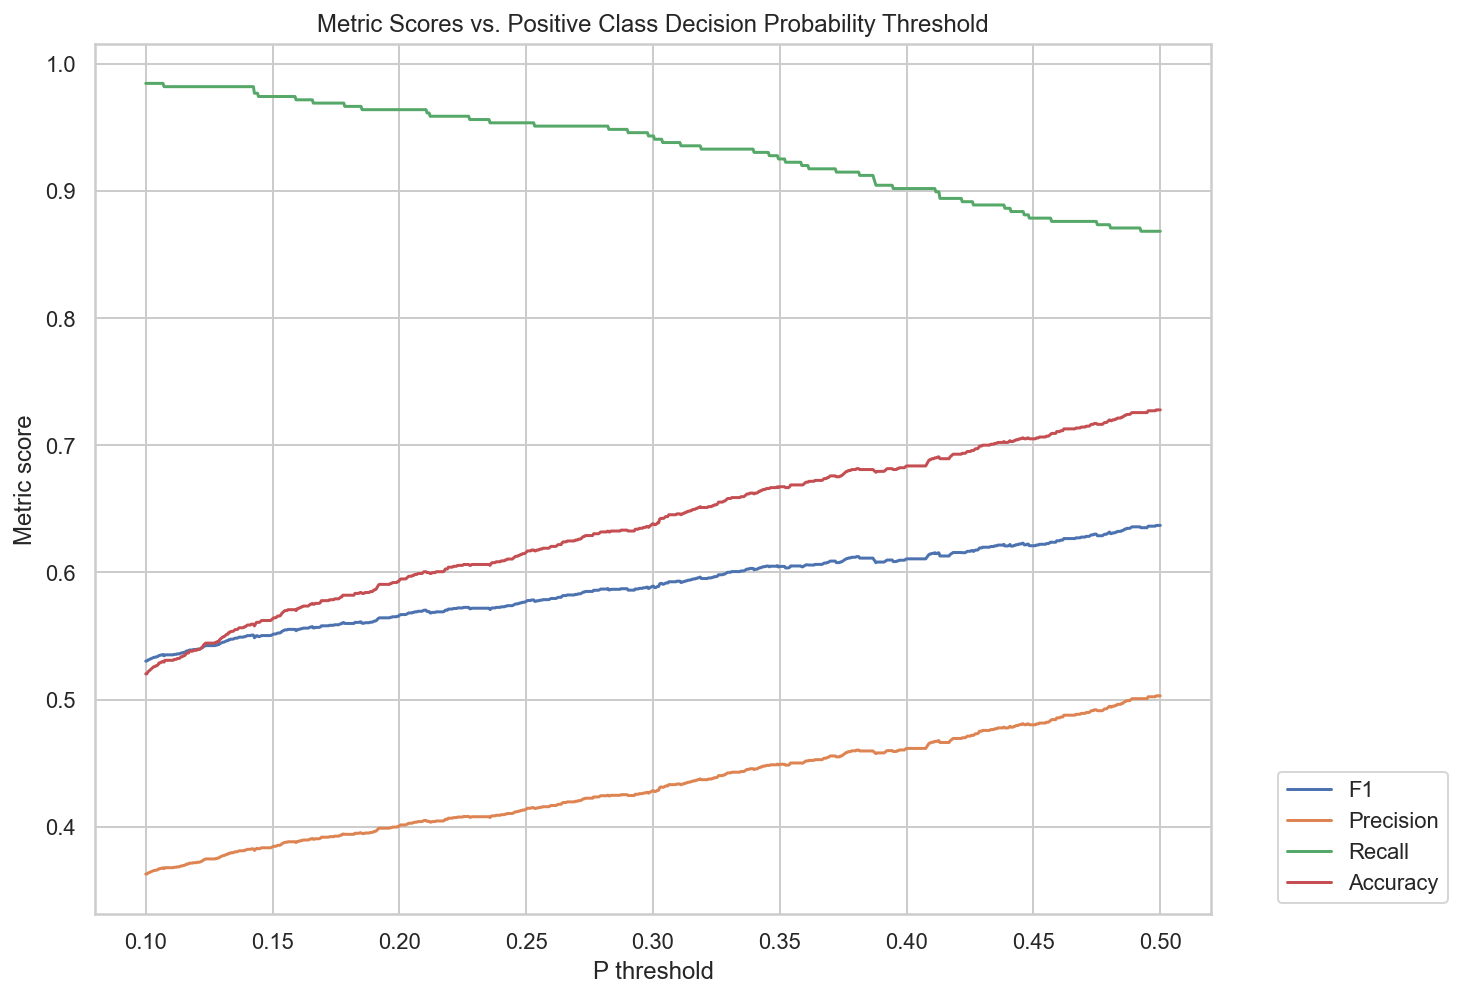

In [92]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = ada_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(fbeta_score(y_val, model_val_labels,beta=1 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

ADASYN XGBoost best test F1 score 0.586 at prob decision threshold >= 0.437


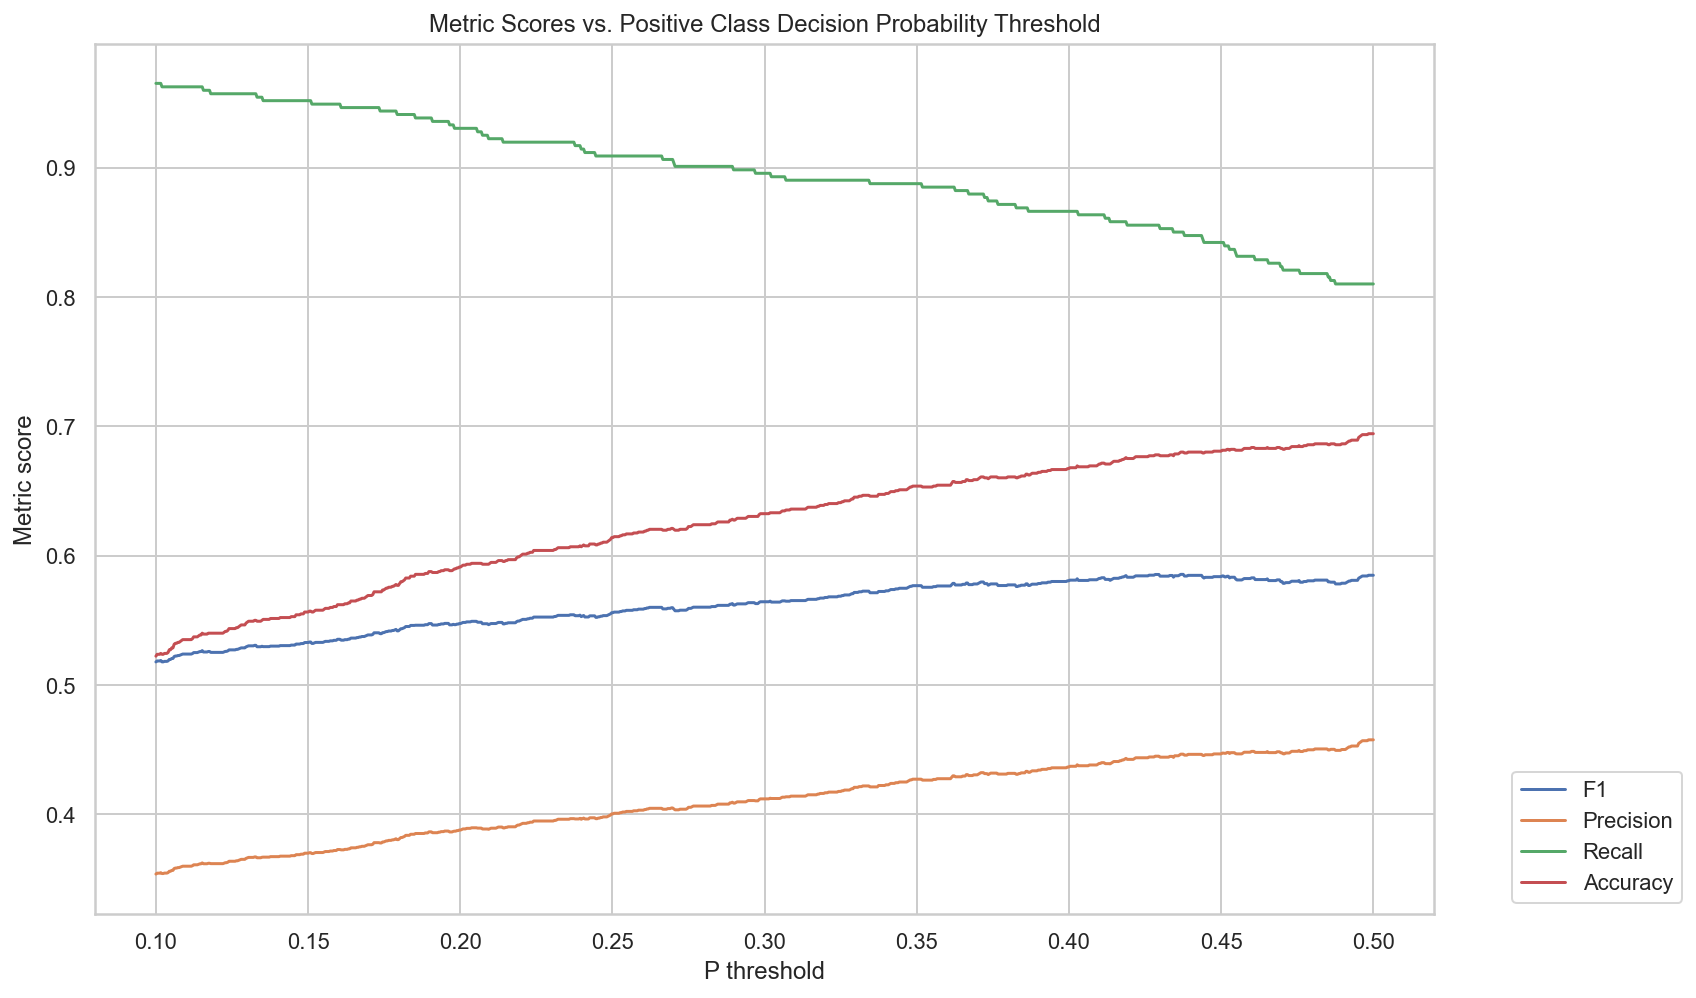

In [93]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = ada_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('ADASYN XGBoost best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [94]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [95]:
## First lets find optimal parameters
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(60,130,8)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 10,12,15],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,4,6,8,10,12],
    'bootstrap': [True, False],
    }
# Output: 

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=2, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5)

rf_grid.fit(x_train, 
            y_train,) 

rf_grid.best_params_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 60}

Final RF Model best test F1 score 0.607 at prob decision threshold >= 0.218


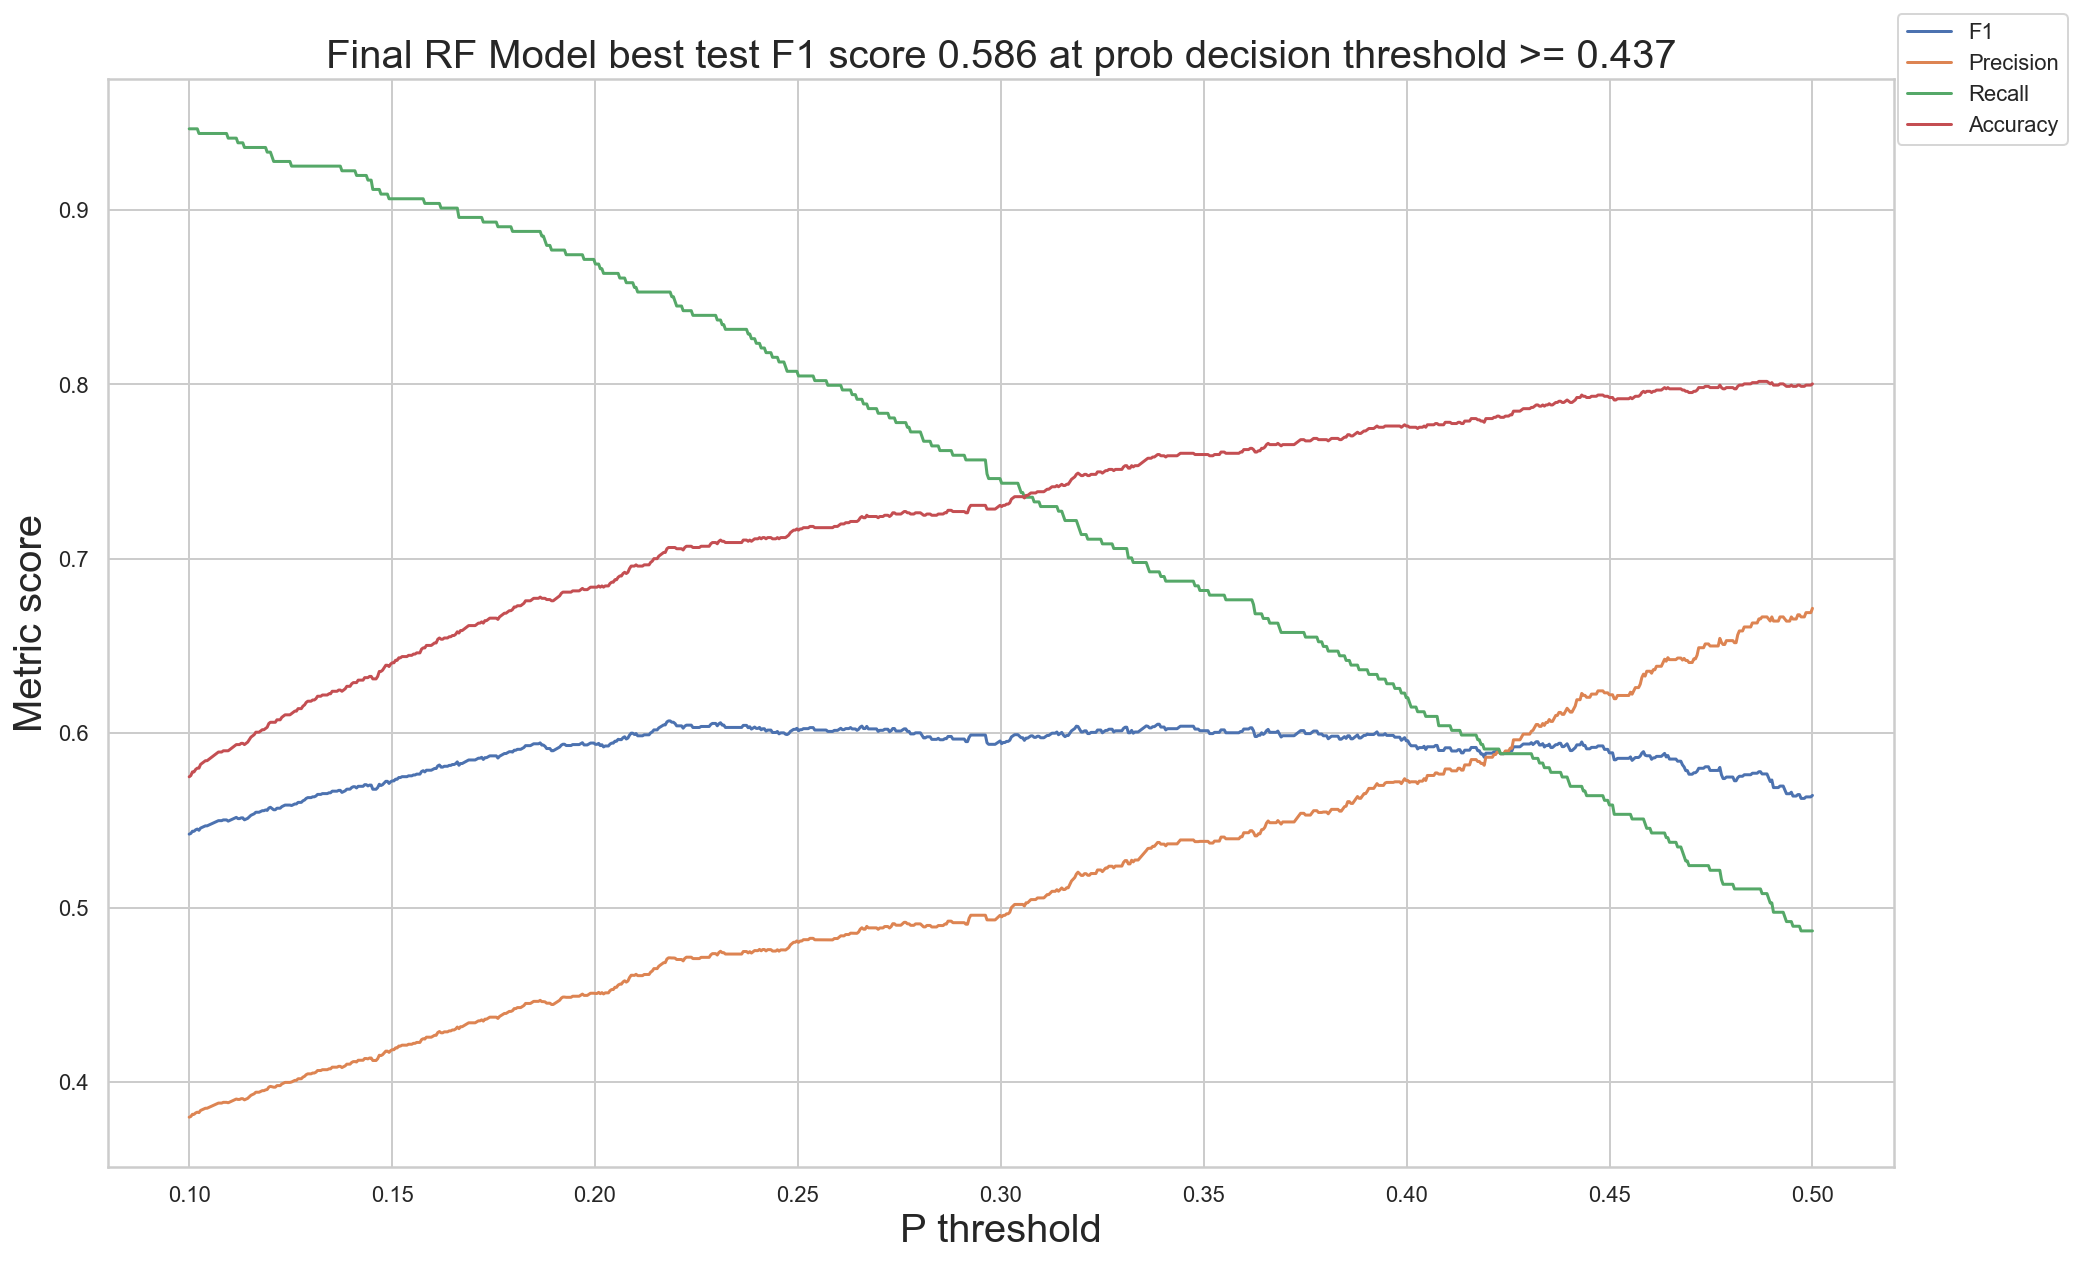

In [96]:
# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_grid.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f1_scores.append(fbeta_score(y_test, model_test_labels,beta=1 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(16,10))
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Final RF Model best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p), fontdict={'size': 20})
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold', fontdict={'size': 20})
plt.ylabel('Metric score',fontdict={'size': 20})

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Final RF Model best test F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

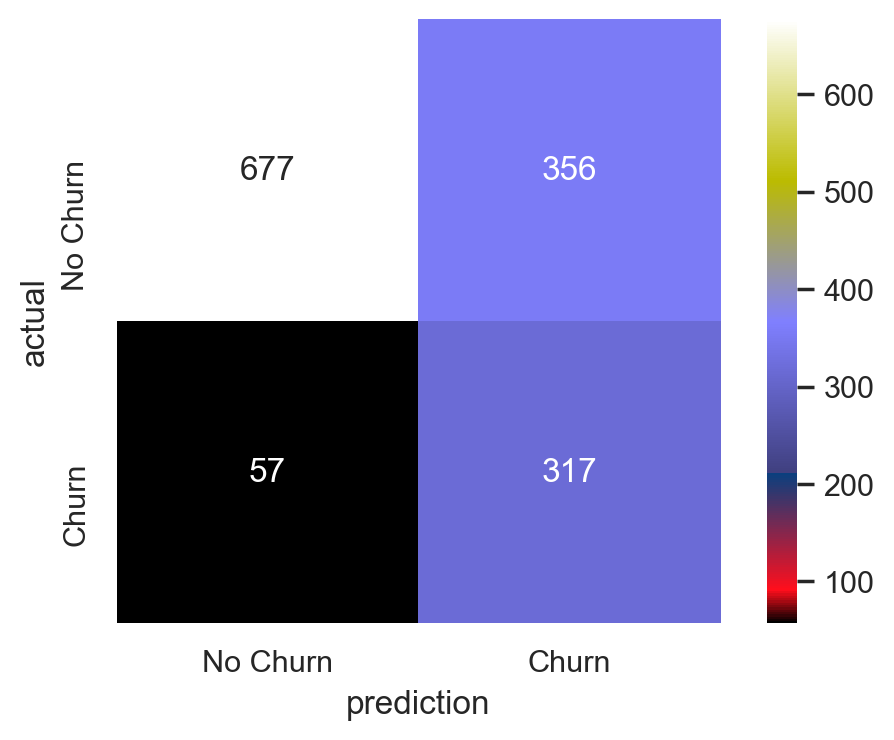

In [97]:
def make_confusion_matrix(model, threshold=0.22):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict_proba = (model.predict_proba(x_test)[:, 1] >= threshold)
    y_predict = model.predict(x_test)
    default_confusion = confusion_matrix(y_test, y_predict_proba)
    plt.figure(dpi=100)
    sns.heatmap(default_confusion, cmap=plt.cm.gist_stern, annot=True, square=True, fmt='d',
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

make_confusion_matrix(rf_grid)